<center><img src="images/logo.png" alt="drawing" width="400" style="background-color:white; padding:1em;" /></center> <br/>

# Application of Deep Learning to Text and Image Data
## Module 2, Lab 1: Processing Text

In this notebook, you will learn techniques to analyze and process text data. Text processing is known as *natural language processing (NLP)* and is an important topic because of how much information is communicated through text. Knowing how to handle text will help you build models that perform better and are more useful.

You will learn the following:

- What a word cloud is and how to create one
- How to use stemming and lemmatization 
- What part-of-speech tagging is and how it impacts text processing
- How to use named entity recognition to sort data

---

You will be presented with two kinds of exercises throughout the notebook: activities and challenges. <br/>

| <img style="float: center;" src="images/activity.png" alt="Activity" width="125"/>| <img style="float: center;" src="images/challenge.png" alt="Challenge" width="125"/>|
| --- | --- |
|<p style="text-align:center;">No coding is needed for an activity. You try to understand a concept, <br/>answer questions, or run a code cell.</p> |<p style="text-align:center;">Challenges are where you can practice your coding skills.</p> |


---
## Index

* [Word cloud](#Word-cloud)
* [Part-of-speech tagging](#Part-of-speech-tagging)
* [Stemming and lemmatization](#Stemming-and-lemmatization)
* [Named entity recognition](#Named-entity-recognition)

---
## Initial Setup
First let's put everything in place.

In [1]:
!pip install -U -q -r requirements.txt

Install the [spaCy](https://spacy.io/usage) library. This will be used to perform some NLP tasks in the lab.

In [2]:
!python -m spacy download en_core_web_sm

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/cuda/__init__.py:551: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 91.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Import the dependencies
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re, string
import spacy
from spacy import displacy

Matplotlib is building the font cache; this may take a moment.
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/cuda/__init__.py:551: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Next, you need to create a function to preprocess text so that only real words, not special characters and numbers, are displayed.

In [4]:
# Preprocess text
def preProcessText(text):
    # Lowercase and strip leading and trailing white space
    text = text.lower().strip()

    # Remove HTML tags
    text = re.compile("<.*?>").sub("", text)

    # Remove punctuation
    text = re.compile("[%s]" % re.escape(string.punctuation)).sub(" ", text)

    # Remove extra white space
    text = re.sub("\s+", " ", text)

    # Remove numbers
    text = re.sub(r"[0-9]", "", text)

    return text

---
## Word cloud

*Word clouds*, which are also known as *text clouds* or *tag clouds*, help you visualize text data by highlighting the important words or phrases. Word clouds convey crucial information at a glance by making commonly occurring words bigger and bolder. These clouds are commonly used to compare and contrast two pieces of text. Word clouds are also used to identify the topic of a document.

To create a word cloud, you will use [WordCloud for Python](https://amueller.github.io/word_cloud).

The following text is from the [What Is Natural Language Processing (NLP)?](https://aws.amazon.com/what-is/nlp) page on aws.amazon.com.

In [5]:
text = "Natural language processing (NLP) is a machine learning technology that gives computers the \
ability to interpret, manipulate, and comprehend human language. Organizations today have large volumes \
of voice and text data from various communication channels like emails, text messages, social media \
newsfeeds, video, audio, and more. They use NLP software to automatically process this data, analyze \
the intent or sentiment in the message, and respond in real time to human communication. \
Natural language processing (NLP) is critical to fully and efficiently analyze text and speech data. \
It can work through the differences in dialects, slang, and grammatical irregularities typical in \
day-to-day conversations. \
Companies use it for several automated tasks, such as to: \
<li>Process, analyze, and archive large documents</li> \
<li>Analyze customer feedback or call center recordings</li> \
<li>Run chatbots for automated customer service</li> \
<li>Answer who-what-when-where questions</li> \
<li>Classify and extract text</li> \
You can also integrate NLP in customer-facing applications to communicate more effectively with \
customers. For example, a chatbot analyzes and sorts customer queries, responding automatically to \
common questions and redirecting complex queries to customer support. This automation helps reduce \
costs, saves agents from spending time on redundant queries, and improves customer satisfaction."

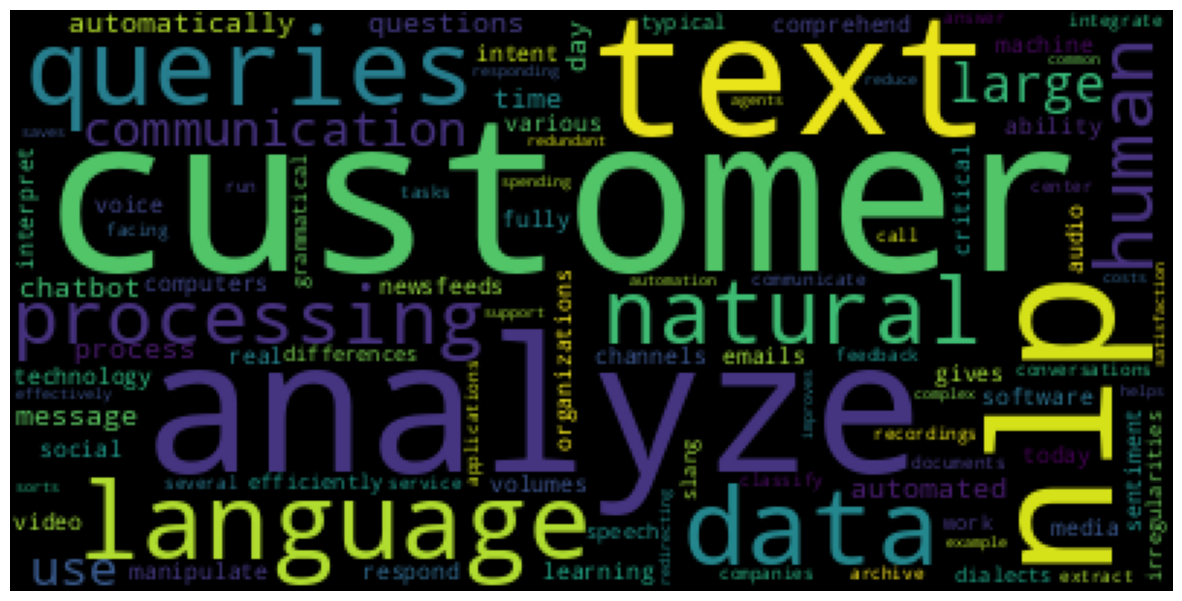

In [6]:
# Remove stop words before generating the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="black", max_words=300)

# Clean up the text to prevent plotting punctuation and duplicate words (for example, 'Natural' and 'natural')
wordcloud.generate(preProcessText(text))

plt.figure(figsize=(15, 10))
plt.axis("off")
plt.imshow(wordcloud)

Now that you have created a word cloud, do you see how it can help you quickly identify key words?

Note that the stop words were removed before the graphic was created. This is important so that words that don't impact the meaning of the text aren't overemphasized. Can you think of some examples of stop words?

In this example, you used the precompiled list of stop words that were curated by the WordCloud for Python project. You can print a list of the stop words to make sure that they cover the stop words that you expect.

In [7]:
# Show the list of stop words
", ".join(list(STOPWORDS))

"wasn't, each, you've, shan't, couldn't, in, more, why, your, what, where, he's, while, isn't, she's, hers, too, being, also, it, they've, what's, who, from, until, having, i'm, that, but, should, on, hence, him, you're, under, with, hadn't, they'd, again, most, why's, been, further, own, she'll, just, whom, would, about, himself, then, i've, herself, so, into, don't, can't, not, she, the, won't, could, is, other, wouldn't, let's, i'll, some, r, didn't, after, such, you'll, he, http, up, weren't, same, we've, i'd, as, they, aren't, therefore, here, we'd, or, she'd, through, have, very, who's, had, that's, else, were, if, nor, he'd, his, this, both, off, however, an, otherwise, at, we're, over, has, cannot, ever, we, once, get, are, you, k, they're, its, our, was, because, he'll, since, haven't, above, than, hasn't, their, here's, how, down, mustn't, be, doesn't, did, it's, my, ours, we'll, yours, there's, they'll, of, me, theirs, during, shouldn't, between, any, no, there, her, them, d

---
## Part-of-speech tagging

The process of classifying words into their corresponding part of speech based on definition and context is called *part-of-speech tagging*, which is also known as *POS tagging*. A part-of-speech tagger processes a sequence of words and attaches a part-of-speech tag to each word. 

For this lab, you will use the [nltk.tag package](https://www.nltk.org/api/nltk.tag.html) from the Natural Language Toolkit (NLTK). Tagged tokens are encoded as tuples (tag, token). For example, the following tagged token combines the word *fly* with a noun part of speech tag, *NN*: `tagged_tok = ('fly', 'NN')`.

The following table provides the meanings for the tags that the NLTK tagger uses.

| Tag | Meaning |
| --- | --- |
| CC | Coordinating conjunction |
| CD | Cardinal digit |
| DT | Determiner |
| EX | Existential "there" (examples: “there is,” “there exists”) |
| FW | Foreign word |
| IN | Preposition or subordinating conjunction |
| JJ | Adjective (example: big) |
| JJR | Adjective, comparative (example: bigger) |
| JJS | Adjective, superlative (example: biggest) |
| LS | List item marker|
| MD | Modal (examples: could, will) |
| NN | Noun, singular or mass (example: desk) |
| NNS | Noun, plural (example: desks) |
| NNP | Proper noun, singular (example: Harrison) |
| NNPS | Proper noun, plural (example: Americans) |
| PDT | Predeterminer (example: "all" the kids) |
| POS | Possessive ending (example: parent’s) |
| PRP | Personal pronoun (examples: I, he, she) |
| RB | Adverb (examples: very, silently) |
| RBR | Adverb, comparative (example: better) |
| RBS | Adverb, superlative (example: best) |
| RP | Particle |
| TO | "To" (example: "to" the store) |
| VB | Verb, base form (example: take) |
| VBD | Verb, past tense (example: took) |
| VBG | Verb, gerund or present participle (example: taking) |
| VBN | Verb, past participle (example: taken) |
| VBP | Verb, singular present, non-third person (example: take) |
| VBZ | Verb, singular present, third person (example: takes) |
| WDT | Wh- determiner (example: which) |
| WP |  Wh- pronoun (examples: who, what) |
| WP$ | Possessive wh- pronoun (example: whose) |
| WRB | Wh- adverb (examples: where, when) |

In [8]:
# Download resources for the following examples
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...


True

Now you can use the tagger to tag each token or word in the following text.

**Important:** Always remember to preprocess the text before tagging, as we have done before in this notebook.

In [9]:
# Text sample
text

'Natural language processing (NLP) is a machine learning technology that gives computers the ability to interpret, manipulate, and comprehend human language. Organizations today have large volumes of voice and text data from various communication channels like emails, text messages, social media newsfeeds, video, audio, and more. They use NLP software to automatically process this data, analyze the intent or sentiment in the message, and respond in real time to human communication. Natural language processing (NLP) is critical to fully and efficiently analyze text and speech data. It can work through the differences in dialects, slang, and grammatical irregularities typical in day-to-day conversations. Companies use it for several automated tasks, such as to: <li>Process, analyze, and archive large documents</li> <li>Analyze customer feedback or call center recordings</li> <li>Run chatbots for automated customer service</li> <li>Answer who-what-when-where questions</li> <li>Classify an

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="./images/activity.png" alt="Activity" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">To use the NLTK part-of-speech tagger, run the following cell.</p> 
    <p style=" text-align: center; margin: auto;">Observe the tags that are assigned to each word, and use the table from a previous cell to understand the meaning of each tag.</p>
    <br>
</div>

In [10]:
# Part-of-speech tagging
pos_tag(word_tokenize(preProcessText(text)))

[('natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('nlp', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('machine', 'NN'),
 ('learning', 'VBG'),
 ('technology', 'NN'),
 ('that', 'WDT'),
 ('gives', 'VBZ'),
 ('computers', 'NNS'),
 ('the', 'DT'),
 ('ability', 'NN'),
 ('to', 'TO'),
 ('interpret', 'VB'),
 ('manipulate', 'NN'),
 ('and', 'CC'),
 ('comprehend', 'VB'),
 ('human', 'JJ'),
 ('language', 'NN'),
 ('organizations', 'NNS'),
 ('today', 'NN'),
 ('have', 'VBP'),
 ('large', 'JJ'),
 ('volumes', 'NNS'),
 ('of', 'IN'),
 ('voice', 'NN'),
 ('and', 'CC'),
 ('text', 'NN'),
 ('data', 'NNS'),
 ('from', 'IN'),
 ('various', 'JJ'),
 ('communication', 'NN'),
 ('channels', 'NNS'),
 ('like', 'IN'),
 ('emails', 'NNS'),
 ('text', 'JJ'),
 ('messages', 'NNS'),
 ('social', 'JJ'),
 ('media', 'NNS'),
 ('newsfeeds', 'NNS'),
 ('video', 'VBP'),
 ('audio', 'JJ'),
 ('and', 'CC'),
 ('more', 'RBR'),
 ('they', 'PRP'),
 ('use', 'VBP'),
 ('nlp', 'JJ'),
 ('software', 'NN'),
 ('to', 'TO'),
 ('automatically', 'RB'),

Refer to the table in a previous cell to identify the tags that the NLTK tagger produces.

---
## Stemming and lemmatization

Stemming and lemmatization are two ways to process words so that a model will be more efficient. Both methods remove parts of words so that they can be grouped together.

For example, in the following sentence, "ning" would be removed from "running" so that "running" and "run" would be categorized the same.

<p style="text-align:center">The child enjoys <b>running</b>, so they <b>run</b> every day.</p>

What could make stemming and lemmatization difficult to do properly?

<div style="border: 4px solid coral; text-align: center; margin: auto;">
    <h3><i>Try it yourself!</i></h3>
    <br>
    <p style="text-align:center;margin:auto;"><img src="images/activity.png" alt="Activity" width="100" /> </p>
    <p style=" text-align: center; margin: auto;">In the next few sections, you will compare stemming and lemmatization.  </p>
    <p style=" text-align: center; margin: auto;">Consider which text processing method is more suitable for the use case that is provided.</p>
        
<br>
</div>

### Stemming
Stemming is a rule-based system to convert words into their root forms by removing suffixes. This method helps to enhance similarities (if any) between sentences.

Examples:

"jumping", "jumped" -> "jump"

"cars" -> "car"

In [11]:
original_text = "   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  "
print(original_text)

   This is a message to be cleaned. It may involve some things like: <br>, ?, :, ''  adjacent spaces and tabs     .  


In [12]:
# Cleaned text
cleaned_text = preProcessText(original_text)
print(cleaned_text)

this is a message to be cleaned it may involve some things like adjacent spaces and tabs 


In [13]:
# Use a tokenizer and stemmer from the NLTK library
# Initialize the stemmer
snow = SnowballStemmer("english")

stemmed_sentence = []
# Tokenize the sentence
words = word_tokenize(cleaned_text)
for w in words:
    # Stem the word/token
    stemmed_sentence.append(snow.stem(w))
stemmed_text = " ".join(stemmed_sentence)

In [14]:
print(stemmed_text)

this is a messag to be clean it may involv some thing like adjac space and tab


From the output of the previous code cell, you can see that stemming isn't perfect. It makes mistakes, such as "messag", "involv", and "adjac". Stemming is a rule-based method that sometimes mistakenly removes suffixes from words. It does run quickly, which makes it appealing to use for massive datasets.

### Lemmatization
If you aren't satisfied with the result of stemming, you can use the lemmatization instead. This method usually requires more work but gives better results.

Lemmatization needs to know the correct word position tags, such as "noun", "verb", or "adjective". You need to use another NLTK function to feed this information to the lemmatizer.

The cell below uses part of the full list of position tags listed in the previous session `Part-of-speech tagging`. 

In [15]:
# Initialize the lemmatizer
wl = WordNetLemmatizer()

# Helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN


lemmatized_sentence = []
# Tokenize the sentence
words = word_tokenize(cleaned_text)
# Get position tags
word_pos_tags = nltk.pos_tag(words)
# Map the position tag and lemmatize the word/token
for idx, tag in enumerate(word_pos_tags):
    lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

lemmatized_text = " ".join(lemmatized_sentence)

In [16]:
print(lemmatized_text)

this be a message to be clean it may involve some thing like adjacent space and tab


How do the results compare? Is the lemmatized text better than the stemmed text?

---
## Named entity recognition

Named entity recognition involves identification of key information in text and then classifying that information into predefined categories, such as person, organization, place, or date. This is one of the most popular NLP tasks.

For this section, you will use [spaCy](https://spacy.io). The following table lists the categories and meanings of the category labels that the spaCy module uses.

| Category | Meaning |
| --- | --- |
| CARDINAL | Numerals that don't fall under another type |
| DATE | Absolute or relative dates or periods |
| EVENT | Named hurricanes, battles, wars, sports events, and so on |
| FAC | Buildings, airports, highways, bridges, and so on |
| GPE | Countries, cities, states |
| LANGUAGE | Any named language |
| LAW | Named documents made into laws |
| LOC | Non-GPE locations, mountain ranges, bodies of water |
| MONEY | Monetary values, including unit |
| NORP | Nationalities, or religious or political groups |
| ORDINAL | "first", "second",  and so on |
| ORG | Companies, agencies, institutions, and so on |
| PERCENT | Percentage, including "%" |
| PERSON | People, including fictional |
| PRODUCT | Objects, vehicles, foods, and so on (not services) |
| QUANTITY | Measurements, as of weight or distance |
| WORK_OF_ART | Titles of books, songs, and so on |


The following text was retrieved from the [Amazon - The Climate Pledge](https://www.aboutamazon.com/planet/climate-pledge) page of the About Amazon website.

In [17]:
# Sample text for named entity recognition
ner_text = "Amazon and Global Optimism co-founded The Climate Pledge, \
a commitment to net-zero \
carbon by 2040."

In [18]:
# Load the spaCy English pipeline for named entity recognition
NER = spacy.load("en_core_web_sm")

# Tag entities in the text
for word in NER(ner_text).ents:
    print(word.text, word.label_)

Amazon ORG
Global Optimism ORG
The Climate Pledge WORK_OF_ART
2040 DATE


---
## Visualizing the Tags
spaCy has a visualizer called displaCy that you can use to visualize tags. Run the following cell to see it working.

In [19]:
# Visual tag with text
displacy.render(NER(ner_text), style="ent", jupyter=True)

As you can see, named entity recognition can help you identify different entities in text. The process isn't always correct, but it can process large sections of text faster than a human can.

----
## Conclusion

In this lab, you practiced using text processing techniques.

---
## Next lab
In the next lab, you will learn about the bag-of-words (BoW) method to convert text data into numerical values.